In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# import storage period and CH4 emission rates
storage_period = pd.read_csv('data/storage_period.csv', header=None)[0]
ch4 = pd.read_csv('data/ch4_df.csv', index_col=0)
means = ch4['means']
stds = ch4['stds']

FileNotFoundError: [Errno 2] No such file or directory: 'data/storage_period.csv'

In [22]:
# calculate daily and yearly emissions
iterations = 10000
days = np.arange(len(means))
day_emissions = [ [] for day in days ]
year_emissions = []
for iteration in range(iterations):
    sum = 0
    for i, day in enumerate(days):
        emission = np.random.normal(means[i], stds[i]) * storage_period[i] * 24 / 1000
        day_emissions[i].append(emission)
        sum += emission
    year_emissions.append(sum)

mean: 0.0321, std: 0.0009


Text(0.5, 0, 'kg CH$_4$ kg TS$^{-1}$ year$^{-1}$')

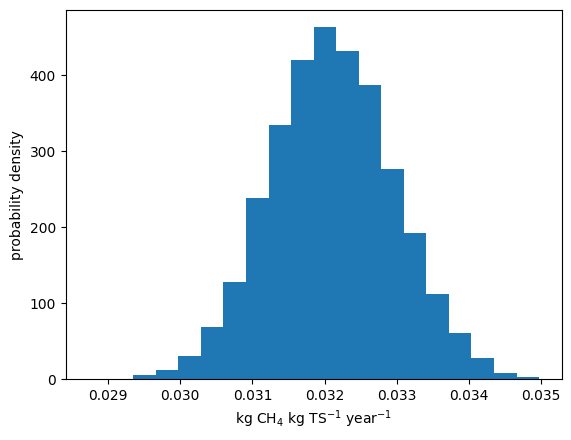

In [24]:
# show yearly emissions
print(f'mean: {np.mean(year_emissions):.4f}, std: {np.std(year_emissions):.4f}')
plt.hist(year_emissions, bins=20, density=True);

plt.ylabel('probability density')
plt.xlabel('kg CH$_4$ kg TS$^{-1}$ year$^{-1}$')